In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/home/zafir/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
stations = ['Karpos', 'Centar', 'Lisice', 'Rektorat', 'Miladinovci']

In [3]:
for station in stations:
    df_weather = pd.read_csv(f'./data/formatted-weather/{station}', index_col = 0)
    
    df_weather.index.name = 'Timestamp'
    wind_bearing = df_weather.windBearing.copy()
    
    df_weather = df_weather.drop(['icon', 'precipAccumulation', 'ozone', 'precipAccumulation.1', 'precipType', 'pressure', 
                 'summary', 'windGust', 'windBearing'], axis=1)
    df_weather.columns = ['apparent_temperature', 'cloud_cover', 'dew_point', 'humidity',
                          'precip_intensity', 'precip_probability', 'temperature', 'uv_index', 
                          'visibility', 'wind_speed']
    
    df_weather['wind_bearing_sin'] = np.sin((2*np.pi/360)*wind_bearing)
    df_weather['wind_bearing_cos'] = np.cos((2*np.pi/360)*wind_bearing)
    
    date_start, date_end = '2011-09-13 18:00:00', '2020-03-31 23:00:00'
    df_weather_truncated = df_weather.loc[date_start:date_end]
    df_weather_truncated.to_csv(f'./data/truncated-weather/{station}', index=True)

/home/zafir/miniconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


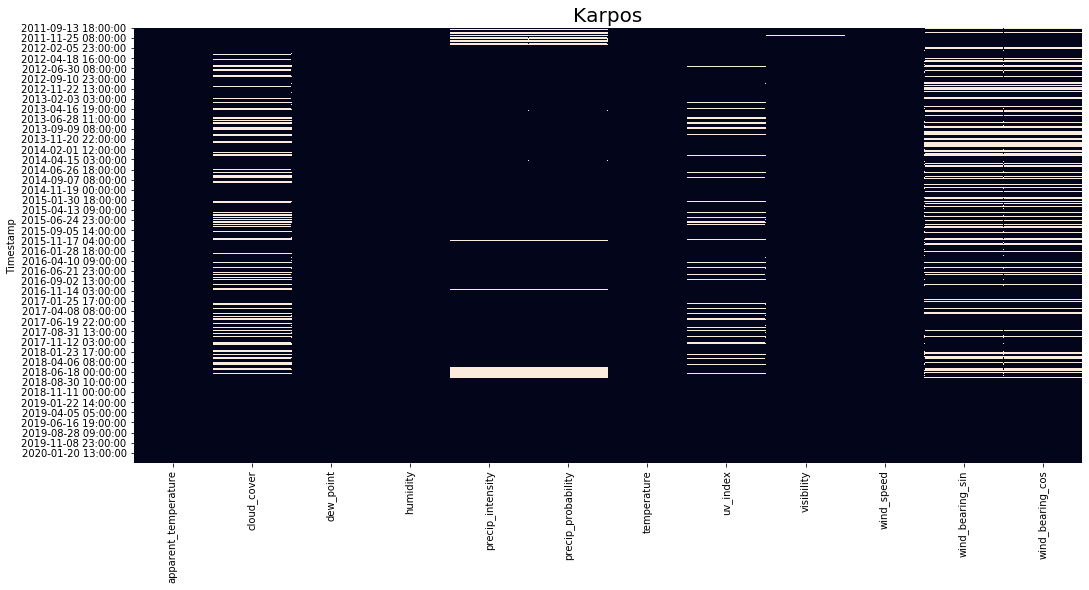

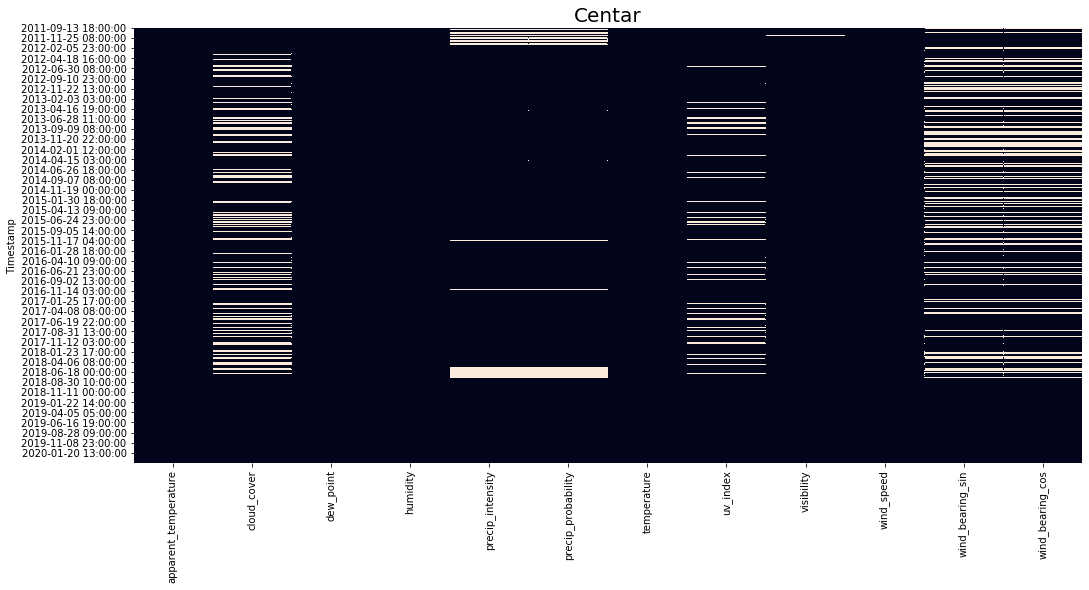

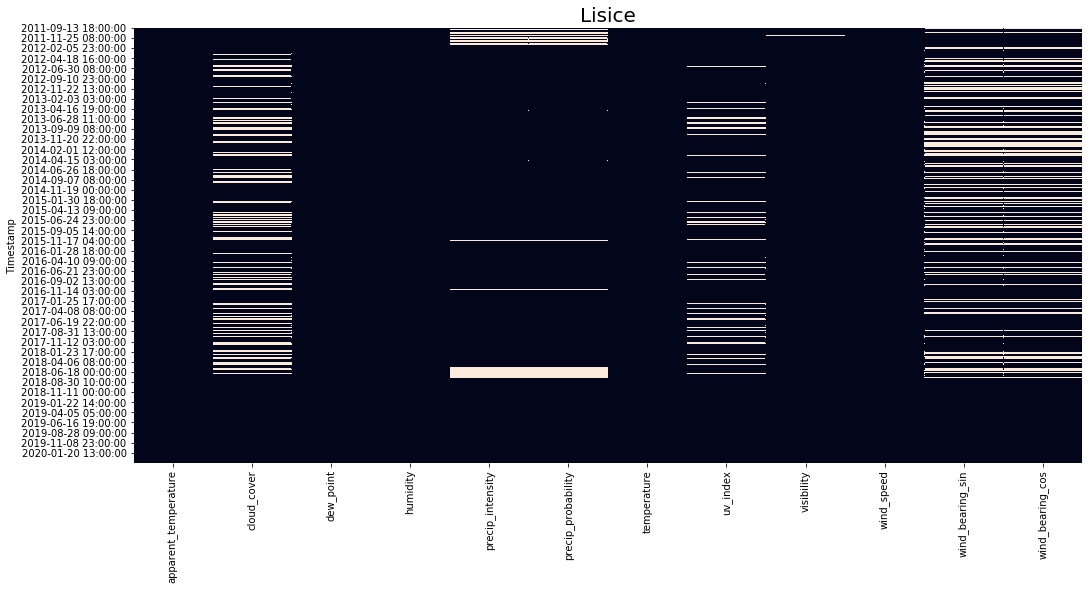

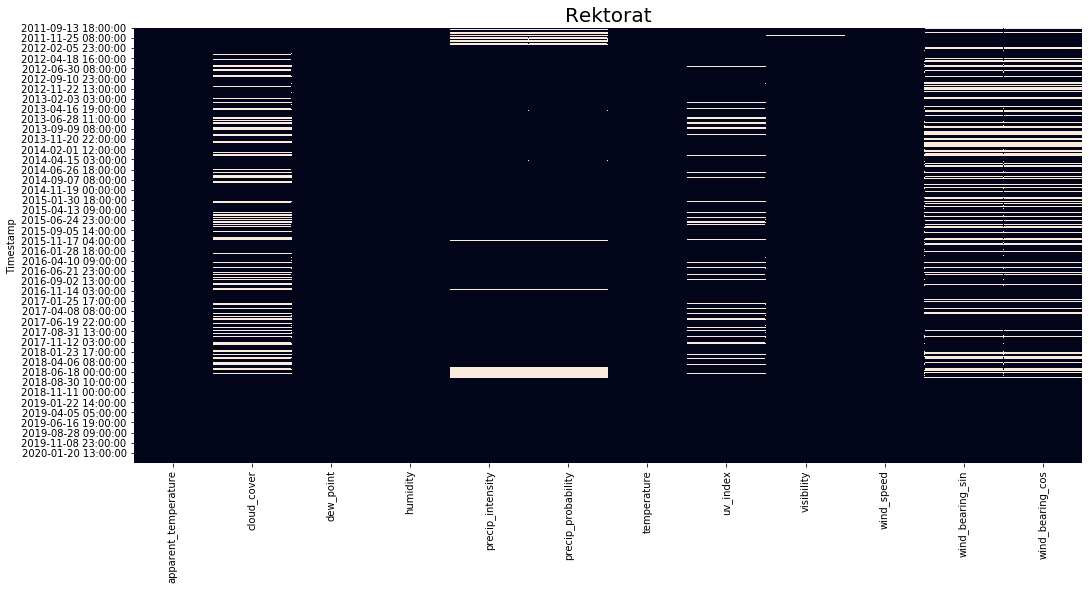

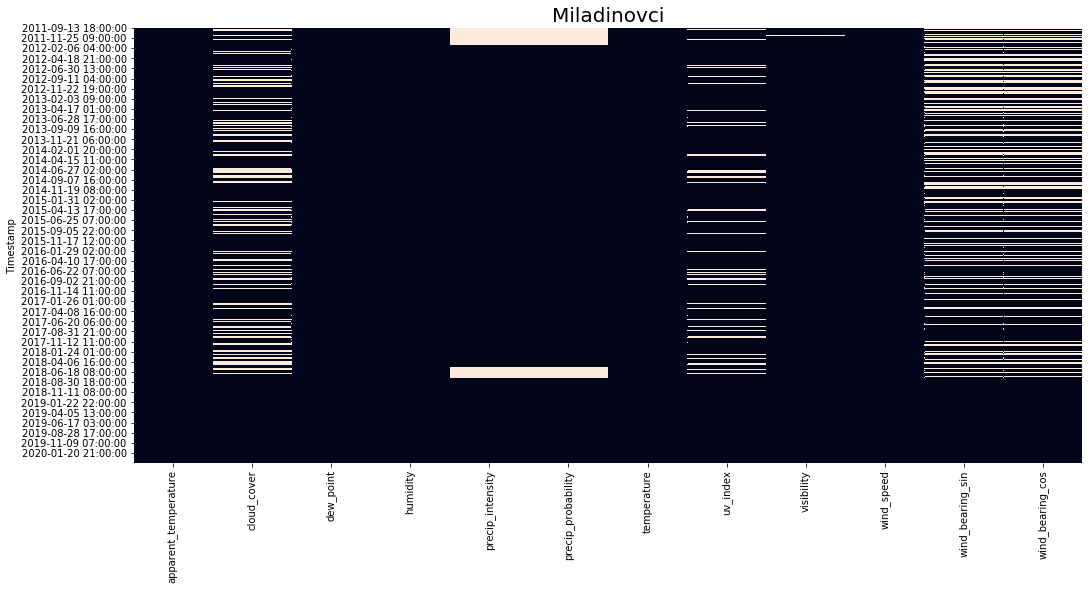

In [4]:
for station in stations:
    df = pd.read_csv(f'./data/truncated-weather/{station}', index_col=0)
    plt.figure(figsize=(17, 8))
    sns.heatmap(df.isnull(), cbar=False).set_title(f'{station}', fontsize=20)
    plt.show()